In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
data['CustomerID'].nunique()

200

In [7]:
data['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data['Genre']=data['Genre'].map({'Male':1,'Female':0})

In [10]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [11]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
x= data[['Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss= []
for i in range(1,15):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_                 # will calucate with in cluster sum of squares
  wcss.append(css)


In [15]:
wcss

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51167.19736842103,
 44389.80767355767,
 40972.08364199881,
 37892.22088636825,
 34662.37127872126,
 32895.05927368927,
 29441.620459343165,
 28024.739768728006]

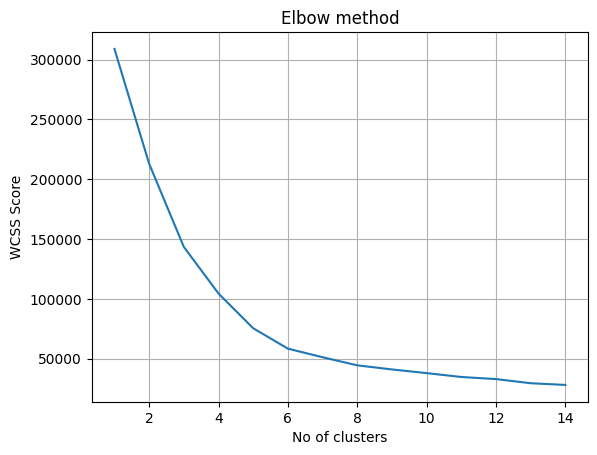

In [17]:
plt.plot(range(1,15),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS Score')
plt.title('Elbow method')
plt.grid()
plt.show()


In [18]:
km=KMeans(n_clusters=5,n_init=10)
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [19]:
cluster_labels=km.predict(x)

In [20]:
cluster_labels

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

In [21]:
pd.Series(cluster_labels).value_counts()

,count
0,80
4,39
3,36
1,23
2,22


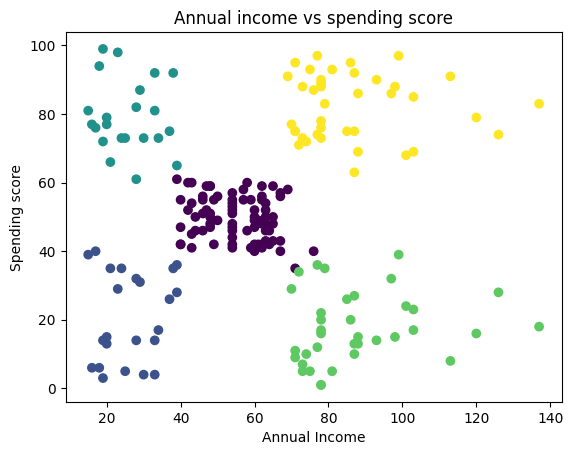

In [22]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=cluster_labels)
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Annual income vs spending score')
plt.show()

In [24]:
data['Cluster_labels']=cluster_labels

In [25]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_labels
0,1,1,19,15,39,1
1,2,1,21,15,81,2
2,3,0,20,16,6,1
3,4,0,23,16,77,2
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,4
196,197,0,45,126,28,3
197,198,1,32,126,74,4
198,199,1,32,137,18,3


In [26]:
cluster_indices=np.where(cluster_labels==0)[0]

In [27]:
cluster_indices

array([ 43,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       126, 142])

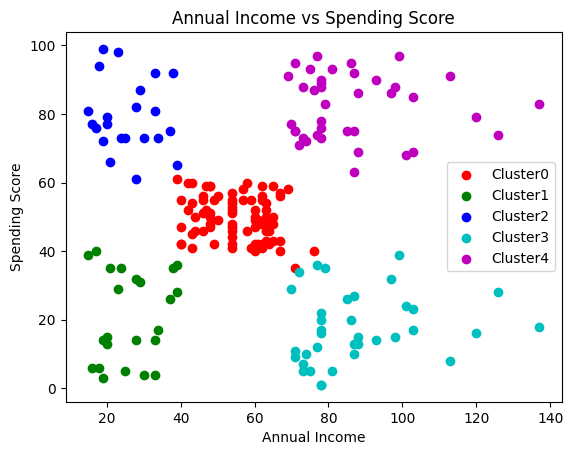

In [28]:
colors=['r','g','b','c','m']
for i in range(max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Annual Income (k$)'],cluster_data['Spending Score (1-100)'],c=colors[i],label=f'Cluster{i}')
plt.xlabel('Annual Income')
plt.ylabel("Spending Score")
plt.title('Annual Income vs Spending Score')
plt.legend()
plt.show()

In [29]:
#prediction
def predict_cluster(genre,age,annual_income,spending_score):
  new_data=[[genre,age,annual_income,spending_score]]
  cluster=km.predict(new_data)
  return cluster[0]

In [30]:
#new_data
new_customer_income=20
new_customer_spend=10
genre='Male'
genre=1 if 'Male' else 0
age=22

c=predict_cluster(genre,age,new_customer_income,new_customer_spend)
print(f'Customer belongs to : {c}')

Customer belongs to : 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Agglomerative Hierarchical Clustering

In [31]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster



In [32]:
mergings=linkage(x,method='ward')

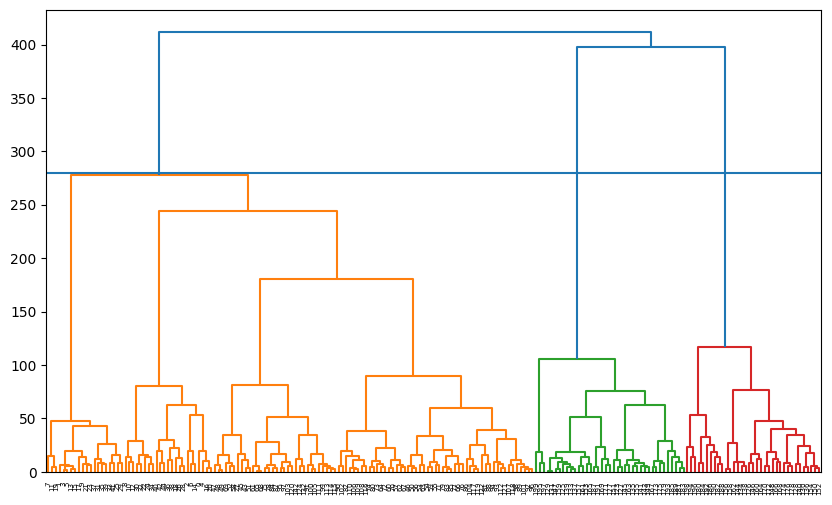

In [33]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(280)
plt.show()

In [34]:
cluster_labels=fcluster(mergings,340,criterion='distance')

In [35]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

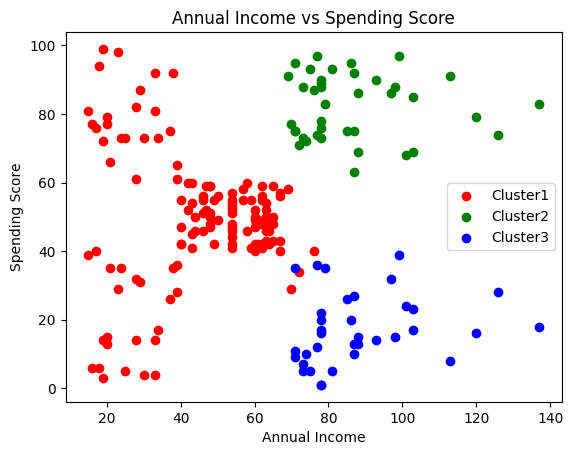

In [36]:
colors=['r','g','b']
for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Annual Income (k$)'],cluster_data['Spending Score (1-100)'],c=colors[i-1],label=f'Cluster{i}')
plt.xlabel('Annual Income')
plt.ylabel("Spending Score")
plt.title('Annual Income vs Spending Score')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.3812859576468096
